There are 2,480,502 rows in the location history dataset
               lat         lon                     datetime  year  month
2064087  47.622409 -122.335432  2021-09-01T00:12:52.699000Z  2021      9
2064088  47.622409 -122.335432  2021-09-01T00:14:58.849000Z  2021      9
2064089  47.622409 -122.335432  2021-09-01T00:16:59.742000Z  2021      9
2064090  47.622409 -122.335432  2021-09-01T00:19:00.010000Z  2021      9
2064091  47.622409 -122.335432  2021-09-01T00:21:10.380000Z  2021      9
...            ...         ...                          ...   ...    ...
2480497  49.740053 -123.120470  2023-09-02T17:28:11.723000Z  2023      9
2480498  49.740054 -123.120459  2023-09-02T17:37:58.442000Z  2023      9
2480499  49.740054 -123.120468  2023-09-02T17:46:24.026000Z  2023      9
2480500  49.740051 -123.120476  2023-09-02T18:06:32.648000Z  2023      9
2480501  49.740045 -123.120470  2023-09-02T18:34:38.397000Z  2023      9

[416415 rows x 5 columns]


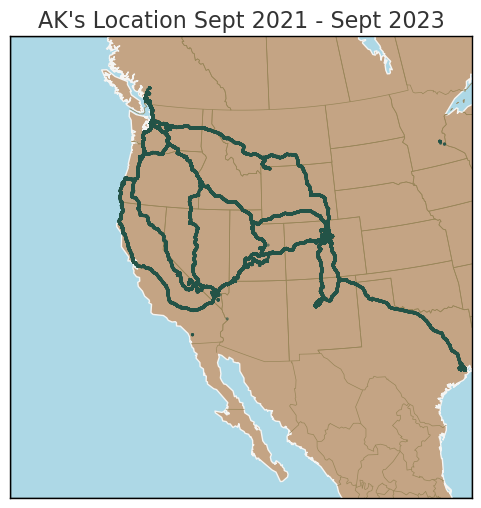

In [9]:
import os
os.environ["PROJ_LIB"] = r'C:\Users\AKs47th\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.9'

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from datetime import datetime as dt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# load the google location history data
df_gps = pd.read_json('Records.json')
print('There are {:,} rows in the location history dataset'.format(len(df_gps)))

# parse lat, lon, and timestamp from the dict inside the locations column
# joe says you are current looping thru the whole data set three times....you should be able to do it once and create the
# three separate variables and also do the date filtering at once.
df_gps['lat'] = df_gps['locations'].map(lambda x: x['latitudeE7'])
df_gps['lon'] = df_gps['locations'].map(lambda x: x['longitudeE7'])
df_gps['timestamp'] = df_gps['locations'].map(lambda x: x['timestamp'])


# convert lat/lon to decimalized degrees and the timestamp to date-time
df_gps['lat'] = df_gps['lat'] / 10.**7
df_gps['lon'] = df_gps['lon'] / 10.**7
df_gps['timestamp'] = pd.to_datetime(df_gps['timestamp'], format='ISO8601')
df_gps['datetime'] = df_gps['timestamp'].dt.strftime('%Y-%m-%dT%H:%M:%S.%fZ')
date_range = '{}-{}'.format(df_gps['datetime'].min()[:4], df_gps['datetime'].max()[:4])

df_gps = df_gps.drop(labels=['locations', 'timestamp'], axis=1, inplace=False)

# define map colors
# you should define the line colors by the cars you've driven
land_color = '#C4A484'
water_color = '#ADD8E6'
coastline_color = '#f5f5f3'
border_color = '#988558'
meridian_color = '#f5f5f3'
marker_fill_color = '#235347'
marker_edge_color = 'None'

# first define a transverse mercator projection for california
map_width_m = 3000 * 1200
map_height_m = 3000 * 1200
target_crs = {'datum':'WGS84',
              'ellps':'WGS84',
              'proj':'tmerc',
              'lon_0':-113,
              'lat_0':38}

# plot the map
fig_width = 6
fig = plt.figure(figsize=[fig_width, fig_width * map_height_m / float(map_width_m)])
ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
ax.set_title('AK\'s Location Sept 2021 - Sept 2023', fontsize=16, color='#333333')

m = Basemap(ellps=target_crs['ellps'],
            projection=target_crs['proj'],
            lon_0=target_crs['lon_0'], 
            lat_0=target_crs['lat_0'],
            width=map_width_m, 
            height=map_height_m,
            resolution='l',
            area_thresh=10000)

m.drawcoastlines(color=coastline_color)
m.drawcountries(color=border_color)
m.fillcontinents(color=land_color, lake_color=water_color)
m.drawstates(color=border_color)
m.drawmapboundary(fill_color=water_color)

#x, y = m(df_gps['lon'].values, df_gps['lat'].values)
#m.scatter(x, y, s=5, color=marker_fill_color, edgecolor=marker_edge_color, alpha=0.6, zorder=3)

#plt.savefig('google_location_history_cal_map.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
#plt.show()

#dates = pd.to_datetime(df_gps['datetime'])
df_gps['year'] = pd.DatetimeIndex(df_gps['datetime']).year
df_gps['month'] = pd.DatetimeIndex(df_gps['datetime']).month

df_gps.loc[((df_gps['month'].isin([9,10,11,12])) & (df_gps['year'] == 2021)) | (df_gps['year'] == 2022) | (df_gps['year'] == 2023) ]
after_trip = df_gps.loc[((df_gps['month'].isin([9,10,11,12])) & (df_gps['year'] == 2021)) | (df_gps['year'] == 2022) | (df_gps['year'] == 2023)]

print(after_trip)

    
x, y = m(after_trip['lon'].values, after_trip['lat'].values)
m.scatter(x, y, s=5, color=marker_fill_color, edgecolor=marker_edge_color, alpha=0.6, zorder=3)

plt.savefig('AK Location Project', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()